<img src="https://github.com/danielscarvalho/data/blob/master/img/FIAP-logo.png?raw=True" style="float:right;" width="200px">

# DATA SCIENCE & STATISTICAL COMPUTING [》](https://www.fiap.com.br/)

## Dataframe & Python

### LAP Parte 2: “Cookbook"

https://pandas.pydata.org/docs/user_guide/cookbook.html#cookbook

Sugestão: Colocar a página do Cookbook lado a lado com este notebook para realizar as operações.

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [5]:
df.loc[df.AAA >= 5, "BBB"] = -1
df

,AAA,BBB,CCC
0,4,10,100
1,5,-1,50
2,6,-1,-30
3,7,-1,-50


In [6]:
df.loc[df.AAA >= 5, ["BBB", "CCC"]] = 555

df

,AAA,BBB,CCC
0,4,10,100
1,5,555,555
2,6,555,555
3,7,555,555


In [7]:
df.loc[df.AAA < 5, ["BBB", "CCC"]] = 2000

df

,AAA,BBB,CCC
0,4,2000,2000
1,5,555,555
2,6,555,555
3,7,555,555


In [8]:
df_mask = pd.DataFrame(
    {"AAA": [True] * 4, "BBB": [False] * 4, "CCC": [True, False] * 2}
)


df.where(df_mask, -1000)

,AAA,BBB,CCC
0,4,-1000,2000
1,5,-1000,-1000
2,6,-1000,555
3,7,-1000,-1000


In [9]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)


df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [10]:
df["logic"] = np.where(df["AAA"] > 5, "high", "low")

df

,AAA,BBB,CCC,logic
0,4,10,100,low
1,5,20,50,low
2,6,30,-30,high
3,7,40,-50,high


# Splitting

In [11]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)


df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [12]:
df[df.AAA <= 5]

,AAA,BBB,CCC
0,4,10,100
1,5,20,50


In [13]:
df[df.AAA > 5]

,AAA,BBB,CCC
2,6,30,-30
3,7,40,-50


# Building criteria

In [14]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)


df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [15]:
df.loc[(df["BBB"] < 25) & (df["CCC"] >= -40), "AAA"]

0    4
1    5
Name: AAA, dtype: int64

In [16]:
df.loc[(df["BBB"] > 25) | (df["CCC"] >= -40), "AAA"]

0    4
1    5
2    6
3    7
Name: AAA, dtype: int64

In [17]:
df.loc[(df["BBB"] > 25) | (df["CCC"] >= 75), "AAA"] = 999

df

,AAA,BBB,CCC
0,999,10,100
1,5,20,50
2,999,30,-30
3,999,40,-50


In [18]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)


df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [19]:
aValue = 43.0

df.loc[(df.CCC - aValue).abs().argsort()]

,AAA,BBB,CCC
1,5,20,50
0,4,10,100
2,6,30,-30
3,7,40,-50


In [20]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)


df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [22]:
Crit1 = df.AAA <= 5.5

Crit2 = df.BBB == 10.0

Crit3 = df.CCC > -40.0

In [23]:
AllCrit = Crit1 & Crit2 & Crit3

In [24]:
import functools

CritList = [Crit1, Crit2, Crit3]

AllCrit = functools.reduce(lambda x, y: x & y, CritList)

df[AllCrit]

,AAA,BBB,CCC
0,4,10,100


# Selection

In [26]:
f = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)


df


,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [27]:

df[(df.AAA <= 6) & (df.index.isin([0, 2, 4]))]

,AAA,BBB,CCC
0,4,10,100
2,6,30,-30


In [29]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]},
    index=["foo", "bar", "boo", "kar"],
)
df

,AAA,BBB,CCC
foo,4,10,100
bar,5,20,50
boo,6,30,-30
kar,7,40,-50


In [30]:
df.loc["bar":"kar"]  # Label

,AAA,BBB,CCC
bar,5,20,50
boo,6,30,-30
kar,7,40,-50


In [31]:
df[0:3]

,AAA,BBB,CCC
foo,4,10,100
bar,5,20,50
boo,6,30,-30


In [32]:
df["bar":"kar"]

,AAA,BBB,CCC
bar,5,20,50
boo,6,30,-30
kar,7,40,-50


In [33]:
data = {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}

df2 = pd.DataFrame(data=data, index=[1, 2, 3, 4])  # Note index starts at 1.

df2.iloc[1:3]  # Position-oriented

,AAA,BBB,CCC
2,5,20,50
3,6,30,-30


In [34]:
df2.loc[1:3]  # Label-oriented

,AAA,BBB,CCC
1,4,10,100
2,5,20,50
3,6,30,-30


In [35]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)


df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [37]:
#Using inverse operator (~) to take the complement of a mask
df[~((df.AAA <= 6) & (df.index.isin([0, 2, 4])))]

,AAA,BBB,CCC
1,5,20,50
3,7,40,-50


# New columns

In [42]:
df = pd.DataFrame({"AAA": [1, 2, 1, 3], "BBB": [1, 1, 2, 2], "CCC": [2, 1, 3, 1]})

df

,AAA,BBB,CCC
0,1,1,2
1,2,1,1
2,1,2,3
3,3,2,1


In [43]:
#Efficiently and dynamically creating new columns using DataFrame.map (previously named applymap)

source_cols = df.columns  # Or some subset would work too

new_cols = [str(x) + "_cat" for x in source_cols]

categories = {1: "Alpha", 2: "Beta", 3: "Charlie"}

df[new_cols] = df[source_cols].map(categories.get)

df

,AAA,BBB,CCC,AAA_cat,BBB_cat,CCC_cat
0,1,1,2,Alpha,Alpha,Beta
1,2,1,1,Beta,Alpha,Alpha
2,1,2,3,Alpha,Beta,Charlie
3,3,2,1,Charlie,Beta,Alpha


In [44]:
#Keep other columns when using min() with groupby

f = pd.DataFrame(
    {"AAA": [1, 1, 1, 2, 2, 2, 3, 3], "BBB": [2, 1, 3, 4, 5, 1, 2, 3]}
)


df

,AAA,BBB,CCC,AAA_cat,BBB_cat,CCC_cat
0,1,1,2,Alpha,Alpha,Beta
1,2,1,1,Beta,Alpha,Alpha
2,1,2,3,Alpha,Beta,Charlie
3,3,2,1,Charlie,Beta,Alpha


In [45]:
#dxmin() to get the index of the minimums

df.loc[df.groupby("AAA")["BBB"].idxmin()]

,AAA,BBB,CCC,AAA_cat,BBB_cat,CCC_cat
0,1,1,2,Alpha,Alpha,Beta
1,2,1,1,Beta,Alpha,Alpha
3,3,2,1,Charlie,Beta,Alpha


In [46]:
#sort then take first of each

df.sort_values(by="BBB").groupby("AAA", as_index=False).first()

,AAA,BBB,CCC,AAA_cat,BBB_cat,CCC_cat
0,1,1,2,Alpha,Alpha,Beta
1,2,1,1,Beta,Alpha,Alpha
2,3,2,1,Charlie,Beta,Alpha


# Multiindexing

In [47]:
#Creating a MultiIndex from a labeled frame

df = pd.DataFrame(
    {
        "row": [0, 1, 2],
        "One_X": [1.1, 1.1, 1.1],
        "One_Y": [1.2, 1.2, 1.2],
        "Two_X": [1.11, 1.11, 1.11],
        "Two_Y": [1.22, 1.22, 1.22],
    }
)


df

,row,One_X,One_Y,Two_X,Two_Y
0,0,1.1,1.2,1.11,1.22
1,1,1.1,1.2,1.11,1.22
2,2,1.1,1.2,1.11,1.22


In [48]:
# As Labelled Index
df = df.set_index("row")

df

,One_X,One_Y,Two_X,Two_Y
row,,,,
0,1.1,1.2,1.11,1.22
1,1.1,1.2,1.11,1.22
2,1.1,1.2,1.11,1.22


In [49]:
# With Hierarchical Columns
df.columns = pd.MultiIndex.from_tuples([tuple(c.split("_")) for c in df.columns])

df

One        Two      
       X    Y     X     Y
row                      
0    1.1  1.2  1.11  1.22
1    1.1  1.2  1.11  1.22
2    1.1  1.2  1.11  1.22

In [50]:
# Now stack & Reset
df = df.stack(0, future_stack=True).reset_index(1)

df

,level_1,X,Y
row,,,
0,One,1.10,1.20
0,Two,1.11,1.22
1,One,1.10,1.20
1,Two,1.11,1.22
2,One,1.10,1.20
2,Two,1.11,1.22


In [51]:
# And fix the labels (Notice the label 'level_1' got added automatically)
df.columns = ["Sample", "All_X", "All_Y"]

df

,Sample,All_X,All_Y
row,,,
0,One,1.10,1.20
0,Two,1.11,1.22
1,One,1.10,1.20
1,Two,1.11,1.22
2,One,1.10,1.20
2,Two,1.11,1.22


# Arithmetic

In [52]:
#Performing arithmetic with a MultiIndex that needs broadcasting

cols = pd.MultiIndex.from_tuples(
    [(x, y) for x in ["A", "B", "C"] for y in ["O", "I"]]
)


df = pd.DataFrame(np.random.randn(2, 6), index=["n", "m"], columns=cols)

df

A                   B                   C          
          O         I         O         I         O         I
n -1.340266  0.478068  0.522054 -0.595088 -0.222076  1.189638
m  0.801982 -0.300729  1.543256 -0.150583  0.070058  0.751050

In [54]:
df = df.div(df["C"], level=1)

df

A                    B              C     
           O         I          O         I    O    I
n   6.035170  0.401860  -2.350790 -0.500226  1.0  1.0
m  11.447478 -0.400411  22.028395 -0.200496  1.0  1.0

# Slicing

In [55]:
#Slicing a MultiIndex with xs

coords = [("AA", "one"), ("AA", "six"), ("BB", "one"), ("BB", "two"), ("BB", "six")]

index = pd.MultiIndex.from_tuples(coords)

df = pd.DataFrame([11, 22, 33, 44, 55], index, ["MyData"])

df

MyData
AA one      11
   six      22
BB one      33
   two      44
   six      55

In [56]:
#To take the cross section of the 1st level and 1st axis the index:

# Note : level and axis are optional, and default to zero
df.xs("BB", level=0, axis=0)

,MyData
one,33
two,44
six,55


In [57]:
#…and now the 2nd level of the 1st axis.

df.xs("six", level=1, axis=0)

,MyData
AA,22
BB,55


In [58]:
#Slicing a MultiIndex with xs, method #2

import itertools

index = list(itertools.product(["Ada", "Quinn", "Violet"], ["Comp", "Math", "Sci"]))

headr = list(itertools.product(["Exams", "Labs"], ["I", "II"]))

indx = pd.MultiIndex.from_tuples(index, names=["Student", "Course"])

cols = pd.MultiIndex.from_tuples(headr)  # Notice these are un-named

data = [[70 + x + y + (x * y) % 3 for x in range(4)] for y in range(9)]

df = pd.DataFrame(data, indx, cols)

df

Exams     Labs    
                   I  II    I  II
Student Course                   
Ada     Comp      70  71   72  73
        Math      71  73   75  74
        Sci       72  75   75  75
Quinn   Comp      73  74   75  76
        Math      74  76   78  77
        Sci       75  78   78  78
Violet  Comp      76  77   78  79
        Math      77  79   81  80
        Sci       78  81   81  81

In [59]:
All = slice(None)

df.loc["Violet"]

Exams     Labs    
           I  II    I  II
Course                   
Comp      76  77   78  79
Math      77  79   81  80
Sci       78  81   81  81

In [60]:
df.loc[(All, "Math"), All]

Exams     Labs    
                   I  II    I  II
Student Course                   
Ada     Math      71  73   75  74
Quinn   Math      74  76   78  77
Violet  Math      77  79   81  80

In [61]:
df.loc[(slice("Ada", "Quinn"), "Math"), All]

Exams     Labs    
                   I  II    I  II
Student Course                   
Ada     Math      71  73   75  74
Quinn   Math      74  76   78  77

In [62]:
df.loc[(All, "Math"), ("Exams")]

,,I,II
Student,Course,,
Ada,Math,71,73
Quinn,Math,74,76
Violet,Math,77,79


In [63]:
df.loc[(All, "Math"), (All, "II")]

,,Exams,Labs
,,II,II
Student,Course,,
Ada,Math,73,74
Quinn,Math,76,77
Violet,Math,79,80


# Sorting

In [65]:
#Sort by specific column or an ordered list of columns, with a MultiIndex

df.sort_values(by=("Labs", "II"), ascending=False)

#Partial selection, the need for sortedness GH 2995

Exams     Labs    
                   I  II    I  II
Student Course                   
Violet  Sci       78  81   81  81
        Math      77  79   81  80
        Comp      76  77   78  79
Quinn   Sci       75  78   78  78
        Math      74  76   78  77
        Comp      73  74   75  76
Ada     Sci       72  75   75  75
        Math      71  73   75  74
        Comp      70  71   72  73

# Levels
## Prepending a level to a multiindex

## Flatten Hierarchical columns

# Missing data
# The missing data docs.

In [66]:
df = pd.DataFrame(
    np.random.randn(6, 1),
    index=pd.date_range("2013-08-01", periods=6, freq="B"),
    columns=list("A"),
)


df.loc[df.index[3], "A"] = np.nan

df

,A
2013-08-01,-1.402108
2013-08-02,1.304579
2013-08-05,-0.251002
2013-08-06,NaN
2013-08-07,0.950706
2013-08-08,0.976585


In [69]:
df.bfill()

# cumsum reset at NaN values

,A
2013-08-01,-1.402108
2013-08-02,1.304579
2013-08-05,-0.251002
2013-08-06,0.950706
2013-08-07,0.950706
2013-08-08,0.976585


In [70]:
#Replace
#Using replace with backrefs

# Grouping
## The grouping docs.

### Basic grouping with apply

In [71]:
# Unlike agg, apply’s callable is passed a sub-DataFrame which gives you access to all the columns

df = pd.DataFrame(
    {
        "animal": "cat dog cat fish dog cat cat".split(),
        "size": list("SSMMMLL"),
        "weight": [8, 10, 11, 1, 20, 12, 12],
        "adult": [False] * 5 + [True] * 2,
    }
)


df

,animal,size,weight,adult
0,cat,S,8,False
1,dog,S,10,False
2,cat,M,11,False
3,fish,M,1,False
4,dog,M,20,False
5,cat,L,12,True
6,cat,L,12,True


In [73]:

gb = df.groupby("animal")

gb.get_group("cat")

,animal,size,weight,adult
0,cat,S,8,False
2,cat,M,11,False
5,cat,L,12,True
6,cat,L,12,True


In [76]:
#Apply to different items in a group

def GrowUp(x):
    avg_weight = sum(x[x["size"] == "S"].weight * 1.5)
    avg_weight += sum(x[x["size"] == "M"].weight * 1.25)
    avg_weight += sum(x[x["size"] == "L"].weight)
    avg_weight /= len(x)
    return pd.Series(["L", avg_weight, True], index=["size", "weight", "adult"])


expected_df = gb.apply(GrowUp)

expected_df

,size,weight,adult
animal,,,
cat,L,12.4375,True
dog,L,20.0000,True
fish,L,1.2500,True


In [77]:
# List the size of the animals with the highest weight.
df.groupby("animal").apply(lambda subf: subf["size"][subf["weight"].idxmax()])

animal
cat     L
dog     M
fish    M
dtype: object

In [79]:
#Expanding apply

S = pd.Series([i / 100.0 for i in range(1, 11)])

def cum_ret(x, y):
    return x * (1 + y)


def red(x):
    return functools.reduce(cum_ret, x, 1.0)

S.expanding().apply(red, raw=True)

0    1.010000
1    1.030200
2    1.061106
3    1.103550
4    1.158728
5    1.228251
6    1.314229
7    1.419367
8    1.547110
9    1.701821
dtype: float64

In [80]:
#Replacing some values with mean of the rest of a group

df = pd.DataFrame({"A": [1, 1, 2, 2], "B": [1, -1, 1, 2]})

gb = df.groupby("A")

def replace(g):
    mask = g < 0
    return g.where(~mask, g[~mask].mean())


gb.transform(replace)

,B
0,1
1,1
2,1
3,2


In [81]:
#Sort groups by aggregated data

df = pd.DataFrame(
    {
        "code": ["foo", "bar", "baz"] * 2,
        "data": [0.16, -0.21, 0.33, 0.45, -0.59, 0.62],
        "flag": [False, True] * 3,
    }
)


code_groups = df.groupby("code")

agg_n_sort_order = code_groups[["data"]].transform("sum").sort_values(by="data")

sorted_df = df.loc[agg_n_sort_order.index]

sorted_df

,code,data,flag
1,bar,-0.21,True
4,bar,-0.59,False
0,foo,0.16,False
3,foo,0.45,True
2,baz,0.33,False
5,baz,0.62,True


In [82]:
#Create multiple aggregated columns

rng = pd.date_range(start="2014-10-07", periods=10, freq="2min")

ts = pd.Series(data=list(range(10)), index=rng)

def MyCust(x):
    if len(x) > 2:
        return x.iloc[1] * 1.234
    return pd.NaT


mhc = {"Mean": "mean", "Max": "max", "Custom": MyCust}

ts.resample("5min").apply(mhc)

,Mean,Max,Custom
2014-10-07 00:00:00,1.0,2,1.234
2014-10-07 00:05:00,3.5,4,NaT
2014-10-07 00:10:00,6.0,7,7.404
2014-10-07 00:15:00,8.5,9,NaT


In [83]:
ts

2014-10-07 00:00:00    0
2014-10-07 00:02:00    1
2014-10-07 00:04:00    2
2014-10-07 00:06:00    3
2014-10-07 00:08:00    4
2014-10-07 00:10:00    5
2014-10-07 00:12:00    6
2014-10-07 00:14:00    7
2014-10-07 00:16:00    8
2014-10-07 00:18:00    9
Freq: 2T, dtype: int64

In [84]:
#Create a value counts column and reassign back to the DataFrame

df = pd.DataFrame(
    {"Color": "Red Red Red Blue".split(), "Value": [100, 150, 50, 50]}
)


df

,Color,Value
0,Red,100
1,Red,150
2,Red,50
3,Blue,50


In [85]:
df["Counts"] = df.groupby(["Color"]).transform(len)

df

,Color,Value,Counts
0,Red,100,3
1,Red,150,3
2,Red,50,3
3,Blue,50,1


In [86]:
#Shift groups of the values in a column based on the index

df = pd.DataFrame(
    {"line_race": [10, 10, 8, 10, 10, 8], "beyer": [99, 102, 103, 103, 88, 100]},
    index=[
        "Last Gunfighter",
        "Last Gunfighter",
        "Last Gunfighter",
        "Paynter",
        "Paynter",
        "Paynter",
    ],
)


df

,line_race,beyer
Last Gunfighter,10,99
Last Gunfighter,10,102
Last Gunfighter,8,103
Paynter,10,103
Paynter,10,88
Paynter,8,100


In [87]:
df["beyer_shifted"] = df.groupby(level=0)["beyer"].shift(1)

df

,line_race,beyer,beyer_shifted
Last Gunfighter,10,99,NaN
Last Gunfighter,10,102,99.0
Last Gunfighter,8,103,102.0
Paynter,10,103,NaN
Paynter,10,88,103.0
Paynter,8,100,88.0


In [88]:
#Select row with maximum value from each group

df = pd.DataFrame(
    {
        "host": ["other", "other", "that", "this", "this"],
        "service": ["mail", "web", "mail", "mail", "web"],
        "no": [1, 2, 1, 2, 1],
    }
).set_index(["host", "service"])


mask = df.groupby(level=0).agg("idxmax")

df_count = df.loc[mask["no"]].reset_index()

df_count

,host,service,no
0,other,web,2
1,that,mail,1
2,this,mail,2


In [90]:
#Grouping like Python’s itertools.groupby

df = pd.DataFrame([0, 1, 0, 1, 1, 1, 0, 1, 1], columns=["A"])

df["A"].groupby((df["A"] != df["A"].shift()).cumsum()).groups
Out[144]: {1: [0], 2: [1], 3: [2], 4: [3, 4, 5], 5: [6], 6: [7, 8]}

df["A"].groupby((df["A"] != df["A"].shift()).cumsum()).cumsum()


0    0
1    1
2    0
3    1
4    2
5    3
6    0
7    1
8    2
Name: A, dtype: int64

### Expanding data
#### Alignment and to-date

#### Rolling Computation window based on values instead of counts

#### Rolling Mean by Time Interval

# Splitting
## Splitting a frame

In [91]:
#Create a list of dataframes, split using a delineation based on logic included in rows.

df = pd.DataFrame(
    data={
        "Case": ["A", "A", "A", "B", "A", "A", "B", "A", "A"],
        "Data": np.random.randn(9),
    }
)


dfs = list(
    zip(
        *df.groupby(
            (1 * (df["Case"] == "B"))
            .cumsum()
            .rolling(window=3, min_periods=1)
            .median()
        )
    )
)[-1]


dfs[0]

,Case,Data
0,A,1.360453
1,A,0.493714
2,A,-0.882828
3,B,0.325896


In [92]:
dfs[1]

,Case,Data
4,A,-0.395859
5,A,2.228739
6,B,1.251336


In [93]:
dfs[2]

,Case,Data
7,A,0.196282
8,A,-0.111664


In [94]:
#Pivot
#The Pivot docs.

#Partial sums and subtotals

df = pd.DataFrame(
    data={
        "Province": ["ON", "QC", "BC", "AL", "AL", "MN", "ON"],
        "City": [
            "Toronto",
            "Montreal",
            "Vancouver",
            "Calgary",
            "Edmonton",
            "Winnipeg",
            "Windsor",
        ],
        "Sales": [13, 6, 16, 8, 4, 3, 1],
    }
)


table = pd.pivot_table(
    df,
    values=["Sales"],
    index=["Province"],
    columns=["City"],
    aggfunc="sum",
    margins=True,
)


table.stack("City", future_stack=True)

Sales
Province City            
AL       Calgary      8.0
         Edmonton     4.0
         Montreal     NaN
         Toronto      NaN
         Vancouver    NaN
         Windsor      NaN
         Winnipeg     NaN
         All         12.0
BC       Calgary      NaN
         Edmonton     NaN
         Montreal     NaN
         Toronto      NaN
         Vancouver   16.0
         Windsor      NaN
         Winnipeg     NaN
         All         16.0
MN       Calgary      NaN
         Edmonton     NaN
         Montreal     NaN
         Toronto      NaN
         Vancouver    NaN
         Windsor      NaN
         Winnipeg     3.0
         All          3.0
ON       Calgary      NaN
         Edmonton     NaN
         Montreal     NaN
         Toronto     13.0
         Vancouver    NaN
         Windsor      1.0
         Winnipeg     NaN
         All         14.0
QC       Calgary      NaN
         Edmonton     NaN
         Montreal     6.0
         Toronto      NaN
         Vancouver    NaN
         Windsor      NaN
         Winnipeg     NaN
         All          6.0
All      Calgary      8.0
         Edmonton     4.0
         Montreal     6.0
         Toronto     13.0
         Vancouver   16.0
         Windsor      1.0
         Winnipeg     3.0
         All         51.0

In [96]:
# Frequency table like plyr in R

grades = [48, 99, 75, 80, 42, 80, 72, 68, 36, 78]

df = pd.DataFrame(
    {
        "ID": ["x%d" % r for r in range(10)],
        "Gender": ["F", "M", "F", "M", "F", "M", "F", "M", "M", "M"],
        "ExamYear": [
            "2007",
            "2007",
            "2007",
            "2008",
            "2008",
            "2008",
            "2008",
            "2009",
            "2009",
            "2009",
        ],
        "Class": [
            "algebra",
            "stats",
            "bio",
            "algebra",
            "algebra",
            "stats",
            "stats",
            "algebra",
            "bio",
            "bio",
        ],
        "Participated": [
            "yes",
            "yes",
            "yes",
            "yes",
            "no",
            "yes",
            "yes",
            "yes",
            "yes",
            "yes",
        ],
        "Passed": ["yes" if x > 50 else "no" for x in grades],
        "Employed": [
            True,
            True,
            True,
            False,
            False,
            False,
            False,
            True,
            True,
            False,
        ],
        "Grade": grades,
    }
)


df.groupby("ExamYear").agg(
    {
        "Participated": lambda x: x.value_counts()["yes"],
        "Passed": lambda x: sum(x == "yes"),
        "Employed": lambda x: sum(x),
        "Grade": lambda x: sum(x) / len(x),
    }
)

,Participated,Passed,Employed,Grade
ExamYear,,,,
2007,3,2,3,74.000000
2008,3,3,0,68.500000
2009,3,2,2,60.666667


In [98]:
# Plot pandas DataFrame with year over year data

# To create year and month cross tabulation:

df = pd.DataFrame(
    {"value": np.random.randn(36)},
    index=pd.date_range("2011-01-01", freq="M", periods=36),
)


pd.pivot_table(
    df, index=df.index.month, columns=df.index.year, values="value", aggfunc="sum"
)


,2011,2012,2013
1,1.364009,0.113849,-1.394991
2,0.299737,-1.630703,-0.810662
3,0.224551,0.039030,0.495038
4,-2.274726,0.607492,-0.752961
5,0.517050,-0.384050,1.165208
6,-2.432100,-0.350205,-1.451285
7,0.110000,1.404325,0.405082
8,-1.049013,0.785965,-0.090712
9,-0.611047,-0.507527,-0.376721
10,-0.049873,-0.742073,0.747271


# Apply
## Rolling apply to organize - Turning embedded lists into a MultiIndex frame

In [99]:


df = pd.DataFrame(
    data={
        "A": [[2, 4, 8, 16], [100, 200], [10, 20, 30]],
        "B": [["a", "b", "c"], ["jj", "kk"], ["ccc"]],
    },
    index=["I", "II", "III"],
)


def SeriesFromSubList(aList):
    return pd.Series(aList)


df_orgz = pd.concat(
    {ind: row.apply(SeriesFromSubList) for ind, row in df.iterrows()}
)


df_orgz

0     1     2     3
I   A    2     4     8  16.0
    B    a     b     c   NaN
II  A  100   200   NaN   NaN
    B   jj    kk   NaN   NaN
III A   10  20.0  30.0   NaN
    B  ccc   NaN   NaN   NaN

In [100]:
#Rolling apply with a DataFrame returning a Series

#Rolling Apply to multiple columns where function calculates a Series before a Scalar from the Series is returned

df = pd.DataFrame(
    data=np.random.randn(2000, 2) / 10000,
    index=pd.date_range("2001-01-01", periods=2000),
    columns=["A", "B"],
)


df

,A,B
2001-01-01,-0.000148,-0.000010
2001-01-02,0.000005,0.000115
2001-01-03,0.000103,0.000013
2001-01-04,0.000066,-0.000053
2001-01-05,0.000138,0.000122
...,...,...
2006-06-19,0.000131,0.000054
2006-06-20,-0.000075,0.000258
2006-06-21,0.000171,0.000105
2006-06-22,0.000140,-0.000119


In [101]:
def gm(df, const):
    v = ((((df["A"] + df["B"]) + 1).cumprod()) - 1) * const
    return v.iloc[-1]


s = pd.Series(
    {
        df.index[i]: gm(df.iloc[i: min(i + 51, len(df) - 1)], 5)
        for i in range(len(df) - 50)
    }
)


s

2001-01-01    0.002123
2001-01-02    0.003001
2001-01-03    0.003338
2001-01-04    0.003244
2001-01-05    0.002666
                ...   
2006-04-30    0.009495
2006-05-01    0.009966
2006-05-02    0.011604
2006-05-03    0.011475
2006-05-04    0.011800
Length: 1950, dtype: float64

In [102]:
#Rolling apply with a DataFrame returning a Scalar

#Rolling Apply to multiple columns where function returns a Scalar (Volume Weighted Average Price)

rng = pd.date_range(start="2014-01-01", periods=100)

df = pd.DataFrame(
    {
        "Open": np.random.randn(len(rng)),
        "Close": np.random.randn(len(rng)),
        "Volume": np.random.randint(100, 2000, len(rng)),
    },
    index=rng,
)


df

,Open,Close,Volume
2014-01-01,1.278892,-1.335032,1116
2014-01-02,-0.230082,-0.298562,1230
2014-01-03,-0.951465,-0.929263,585
2014-01-04,2.157768,-3.238910,270
2014-01-05,0.731328,0.076124,1563
...,...,...,...
2014-04-06,-0.539350,0.171310,1125
2014-04-07,0.824177,1.185726,336
2014-04-08,0.087215,-1.068436,1512
2014-04-09,-0.602780,-0.157077,1503


In [103]:

def vwap(bars):
    return (bars.Close * bars.Volume).sum() / bars.Volume.sum()


window = 5

s = pd.concat(
    [
        (pd.Series(vwap(df.iloc[i: i + window]), index=[df.index[i + window]]))
        for i in range(len(df) - window)
    ]
)


s.round(2)

2014-01-06   -0.66
2014-01-07    0.23
2014-01-08    0.21
2014-01-09    0.19
2014-01-10    0.32
              ... 
2014-04-06   -0.06
2014-04-07   -0.06
2014-04-08    0.17
2014-04-09   -0.11
2014-04-10   -0.07
Length: 95, dtype: float64

# Timeseries
## Between times

Using indexer between time

Constructing a datetime range that excludes weekends and includes only certain times

Vectorized Lookup

Aggregation and plotting time series

Turn a matrix with hours in columns and days in rows into a continuous row sequence in the form of a time series. How to rearrange a Python pandas DataFrame?

Dealing with duplicates when reindexing a timeseries to a specified frequency

In [104]:
#Calculate the first day of the month for each entry in a DatetimeIndex

dates = pd.date_range("2000-01-01", periods=5)

dates.to_period(freq="M").to_timestamp()

DatetimeIndex(['2000-01-01', '2000-01-01', '2000-01-01', '2000-01-01',
               '2000-01-01'],
              dtype='datetime64[ns]', freq=None)

# Resampling
## The Resample docs.

Using Grouper instead of TimeGrouper for time grouping of values

Time grouping with some missing values

Valid frequency arguments to Grouper Timeseries

Grouping using a MultiIndex

Using TimeGrouper and another grouping to create subgroups, then apply a custom function GH 3791

Resampling with custom periods

Resample intraday frame without adding new days

Resample minute data

Resample with groupby

# Merge
## The Join docs.

In [105]:
#Concatenate two dataframes with overlapping index (emulate R rbind)

rng = pd.date_range("2000-01-01", periods=6)

df1 = pd.DataFrame(np.random.randn(6, 3), index=rng, columns=["A", "B", "C"])

df2 = df1.copy()

In [106]:
#Depending on df construction, ignore_index may be needed
df = pd.concat([df1, df2], ignore_index=True)

df

,A,B,C
0,-0.804881,0.154049,-0.868988
1,0.275820,1.062224,0.766059
2,0.165557,-1.317557,-0.433175
3,-0.178146,1.407707,-1.095519
4,0.526861,0.454040,0.115089
5,0.455651,-0.237411,-0.709253
6,-0.804881,0.154049,-0.868988
7,0.275820,1.062224,0.766059
8,0.165557,-1.317557,-0.433175
9,-0.178146,1.407707,-1.095519


In [107]:
#Self Join of a DataFrame GH 2996

df = pd.DataFrame(
    data={
        "Area": ["A"] * 5 + ["C"] * 2,
        "Bins": [110] * 2 + [160] * 3 + [40] * 2,
        "Test_0": [0, 1, 0, 1, 2, 0, 1],
        "Data": np.random.randn(7),
    }
)


df

,Area,Bins,Test_0,Data
0,A,110,0,0.520199
1,A,110,1,0.891818
2,A,160,0,-0.737649
3,A,160,1,-0.795988
4,A,160,2,-1.600910
5,C,40,0,1.062857
6,C,40,1,0.061407


In [110]:
df["Test_1"] = df["Test_0"] - 1

pd.merge(
    df,
    df,
    left_on=["Bins", "Area", "Test_0"],
    right_on=["Bins", "Area", "Test_1"],
    suffixes=("_L", "_R"),
)

#How to set the index and join

#KDB like asof join

#Join with a criteria based on the values

#Using searchsorted to merge based on values inside a range

,Area,Bins,Test_0_L,Data_L,Test_1_L,Test_0_R,Data_R,Test_1_R
0,A,110,0,0.520199,-1,1,0.891818,0
1,A,160,0,-0.737649,-1,1,-0.795988,0
2,A,160,1,-0.795988,0,2,-1.600910,1
3,C,40,0,1.062857,-1,1,0.061407,0


# Plotting
## The Plotting docs.

Make Matplotlib look like R

Setting x-axis major and minor labels

Plotting multiple charts in an IPython Jupyter notebook

Creating a multi-line plot

Plotting a heatmap

Annotate a time-series plot

Annotate a time-series plot #2

Generate Embedded plots in excel files using Pandas, Vincent and xlsxwriter

Boxplot for each quartile of a stratifying variable

<Axes: title={'center': 'price'}, xlabel='quartiles'>

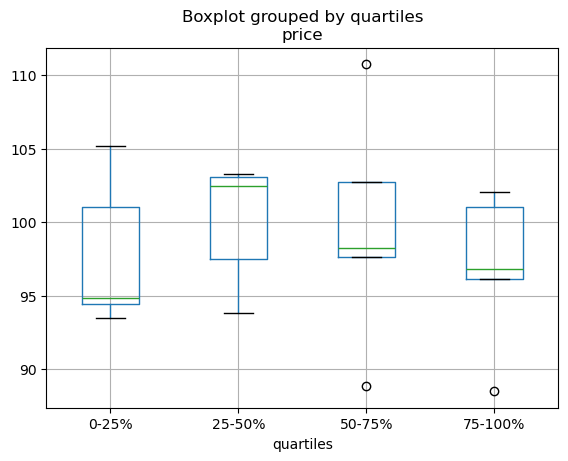

In [111]:
df = pd.DataFrame(
    {
        "stratifying_var": np.random.uniform(0, 100, 20),
        "price": np.random.normal(100, 5, 20),
    }
)


df["quartiles"] = pd.qcut(
    df["stratifying_var"], 4, labels=["0-25%", "25-50%", "50-75%", "75-100%"]
)


df.boxplot(column="price", by="quartiles")

# Data in/out
Performance comparison of SQL vs HDF5

# CSV
The CSV docs

read_csv in action

appending to a csv

Reading a csv chunk-by-chunk

Reading only certain rows of a csv chunk-by-chunk

Reading the first few lines of a frame

Reading a file that is compressed but not by gzip/bz2 (the native compressed formats which read_csv understands). This example shows a WinZipped file, but is a general application of opening the file within a context manager and using that handle to read. See here

Inferring dtypes from a file

Dealing with bad lines GH 2886

Write a multi-row index CSV without writing duplicates

# Reading multiple files to create a single DataFrame
The best way to combine multiple files into a single DataFrame is to read the individual frames one by one, put all of the individual frames into a list, and then combine the frames in the list using pd.concat():

In [112]:
for i in range(3):
    data = pd.DataFrame(np.random.randn(10, 4))
    data.to_csv("file_{}.csv".format(i))


files = ["file_0.csv", "file_1.csv", "file_2.csv"]

result = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

In [113]:
import glob

import os

files = glob.glob("file_*.csv")

result = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

# Parsing date components in multi-columns
Parsing date components in multi-columns is faster with a format

In [114]:
i = pd.date_range("20000101", periods=10000)

df = pd.DataFrame({"year": i.year, "month": i.month, "day": i.day})

df.head()

,year,month,day
0,2000,1,1
1,2000,1,2
2,2000,1,3
3,2000,1,4
4,2000,1,5


In [116]:
%timeit pd.to_datetime(df.year * 10000 + df.month * 100 + df.day, format='%Y%m%d')
ds = df.apply(lambda x: "%04d%02d%02d" % (x["year"], x["month"], x["day"]), axis=1)
ds.head()
%timeit pd.to_datetime(ds)

#4.01 ms +- 635 us per loop (mean +- std. dev. of 7 runs, 100 loops each)
#1.05 ms +- 7.39 us per loop (mean +- std. dev. of 7 runs, 1,000 loops each)

5.79 ms ± 238 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.89 ms ± 237 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Skip row between header and data

In [117]:
data = """;;;;
 ;;;;
 ;;;;
 ;;;;
 ;;;;
 ;;;;
;;;;
 ;;;;
 ;;;;
;;;;
date;Param1;Param2;Param4;Param5
    ;m²;°C;m²;m
;;;;
01.01.1990 00:00;1;1;2;3
01.01.1990 01:00;5;3;4;5
01.01.1990 02:00;9;5;6;7
01.01.1990 03:00;13;7;8;9
01.01.1990 04:00;17;9;10;11
01.01.1990 05:00;21;11;12;13
"""

In [118]:
# Option 1: pass rows explicitly to skip rows
from io import StringIO

pd.read_csv(
    StringIO(data),
    sep=";",
    skiprows=[11, 12],
    index_col=0,
    parse_dates=True,
    header=10,
)

,Param1,Param2,Param4,Param5
date,,,,
1990-01-01 00:00:00,1,1,2,3
1990-01-01 01:00:00,5,3,4,5
1990-01-01 02:00:00,9,5,6,7
1990-01-01 03:00:00,13,7,8,9
1990-01-01 04:00:00,17,9,10,11
1990-01-01 05:00:00,21,11,12,13


In [120]:
# Option 2: read column names and then data
pd.read_csv(StringIO(data), sep=";", header=10, nrows=10).columns


Index(['date', 'Param1', 'Param2', 'Param4', 'Param5'], dtype='object')

In [121]:
columns = pd.read_csv(StringIO(data), sep=";", header=10, nrows=10).columns

pd.read_csv(
    StringIO(data), sep=";", index_col=0, header=12, parse_dates=True, names=columns
)


,Param1,Param2,Param4,Param5
date,,,,
1990-01-01 00:00:00,1,1,2,3
1990-01-01 01:00:00,5,3,4,5
1990-01-01 02:00:00,9,5,6,7
1990-01-01 03:00:00,13,7,8,9
1990-01-01 04:00:00,17,9,10,11
1990-01-01 05:00:00,21,11,12,13


# SQL
The SQL docs

Reading from databases with SQL

# Excel
The Excel docs

Reading from a filelike handle

Modifying formatting in XlsxWriter output

Loading only visible sheets GH 19842#issuecomment-892150745

# HTML
Reading HTML tables from a server that cannot handle the default request header

# HDFStore
The HDFStores docs

Simple queries with a Timestamp Index

Managing heterogeneous data using a linked multiple table hierarchy GH 3032

Merging on-disk tables with millions of rows

Avoiding inconsistencies when writing to a store from multiple processes/threads

De-duplicating a large store by chunks, essentially a recursive reduction operation. Shows a function for taking in data from csv file and creating a store by chunks, with date parsing as well. See here

Creating a store chunk-by-chunk from a csv file

Appending to a store, while creating a unique index

Large Data work flows

Reading in a sequence of files, then providing a global unique index to a store while appending

Groupby on a HDFStore with low group density

Groupby on a HDFStore with high group density

Hierarchical queries on a HDFStore

Counting with a HDFStore

Troubleshoot HDFStore exceptions

Setting min_itemsize with strings

Using ptrepack to create a completely-sorted-index on a store

In [122]:
# Storing Attributes to a group node

df = pd.DataFrame(np.random.randn(8, 3))

store = pd.HDFStore("test.h5")

store.put("df", df)

# you can store an arbitrary Python object via pickle
store.get_storer("df").attrs.my_attribute = {"A": 10}

store.get_storer("df").attrs.my_attribute

{'A': 10}

In [129]:
store = pd.HDFStore("test.h5", "w", driver="H5FD_CORE")

df = pd.DataFrame(np.random.randn(8, 3))

store["test"] = df


In [128]:

# only after closing the store, data is written to disk:
store.close()

# Binary files
## pandas readily accepts NumPy record arrays, if you need to read in a binary file consisting of an array of C structs. For example, given this C program in a file called main.c compiled with gcc main.c -std=gnu99 on a 64-bit machine,

#include <stdio.h>
#include <stdint.h>

typedef struct _Data
{
    int32_t count;
    double avg;
    float scale;
} Data;

int main(int argc, const char *argv[])
{
    size_t n = 10;
    Data d[n];

    for (int i = 0; i < n; ++i)
    {
        d[i].count = i;
        d[i].avg = i + 1.0;
        d[i].scale = (float) i + 2.0f;
    }

    FILE *file = fopen("binary.dat", "wb");
    fwrite(&d, sizeof(Data), n, file);
    fclose(file);

    return 0;
}

In [130]:
# the following Python code will read the binary file 'binary.dat' into a pandas DataFrame, where each element of the struct corresponds to a column in the frame:

names = "count", "avg", "scale"

# note that the offsets are larger than the size of the type because of
# struct padding
offsets = 0, 8, 16
formats = "i4", "f8", "f4"
dt = np.dtype({"names": names, "offsets": offsets, "formats": formats}, align=True)
df = pd.DataFrame(np.fromfile("binary.dat", dt))

FileNotFoundError: [Errno 2] No such file or directory: 'binary.dat'

The offsets of the structure elements may be different depending on the architecture of the machine on which the file was created. Using a raw binary file format like this for general data storage is not recommended, as it is not cross platform. We recommended either HDF5 or parquet, both of which are supported by pandas’ IO facilities.

# Computation
Numerical integration (sample-based) of a time series

## Correlation
Often it’s useful to obtain the lower (or upper) triangular form of a correlation matrix calculated from DataFrame.corr(). This can be achieved by passing a boolean mask to where as follows:

In [131]:
df = pd.DataFrame(np.random.random(size=(100, 5)))

corr_mat = df.corr()

mask = np.tril(np.ones_like(corr_mat, dtype=np.bool_), k=-1)

corr_mat.where(mask)

,0,1,2,3,4
0,NaN,NaN,NaN,NaN,NaN
1,0.056975,NaN,NaN,NaN,NaN
2,0.040714,0.130799,NaN,NaN,NaN
3,-0.006713,-0.015209,0.099473,NaN,NaN
4,0.153846,0.222081,0.136407,-0.07734,NaN


In [132]:
#The method argument within DataFrame.corr can accept a callable in addition to the named correlation types. Here we compute the distance correlation matrix for a DataFrame object.

def distcorr(x, y):
    n = len(x)
    a = np.zeros(shape=(n, n))
    b = np.zeros(shape=(n, n))
    for i in range(n):
        for j in range(i + 1, n):
            a[i, j] = abs(x[i] - x[j])
            b[i, j] = abs(y[i] - y[j])
    a += a.T
    b += b.T
    a_bar = np.vstack([np.nanmean(a, axis=0)] * n)
    b_bar = np.vstack([np.nanmean(b, axis=0)] * n)
    A = a - a_bar - a_bar.T + np.full(shape=(n, n), fill_value=a_bar.mean())
    B = b - b_bar - b_bar.T + np.full(shape=(n, n), fill_value=b_bar.mean())
    cov_ab = np.sqrt(np.nansum(A * B)) / n
    std_a = np.sqrt(np.sqrt(np.nansum(A ** 2)) / n)
    std_b = np.sqrt(np.sqrt(np.nansum(B ** 2)) / n)
    return cov_ab / std_a / std_b


df = pd.DataFrame(np.random.normal(size=(100, 3)))

df.corr(method=distcorr)

,0,1,2
0,1.000000,0.206108,0.145127
1,0.206108,1.000000,0.162354
2,0.145127,0.162354,1.000000


# Timedeltas
## The Timedeltas docs.

In [133]:
# Using timedeltas

import datetime

s = pd.Series(pd.date_range("2012-1-1", periods=3, freq="D"))

s - s.max()

0   -2 days
1   -1 days
2    0 days
dtype: timedelta64[ns]

In [134]:
s.max() - s


0   2 days
1   1 days
2   0 days
dtype: timedelta64[ns]

In [135]:
s - datetime.datetime(2011, 1, 1, 3, 5)

0   364 days 20:55:00
1   365 days 20:55:00
2   366 days 20:55:00
dtype: timedelta64[ns]

In [136]:
s + datetime.timedelta(minutes=5)

0   2012-01-01 00:05:00
1   2012-01-02 00:05:00
2   2012-01-03 00:05:00
dtype: datetime64[ns]

In [137]:
datetime.datetime(2011, 1, 1, 3, 5) - s

0   -365 days +03:05:00
1   -366 days +03:05:00
2   -367 days +03:05:00
dtype: timedelta64[ns]

In [138]:
datetime.timedelta(minutes=5) + s

0   2012-01-01 00:05:00
1   2012-01-02 00:05:00
2   2012-01-03 00:05:00
dtype: datetime64[ns]

In [139]:
# Adding and subtracting deltas and dates

deltas = pd.Series([datetime.timedelta(days=i) for i in range(3)])

df = pd.DataFrame({"A": s, "B": deltas})

df

,A,B
0,2012-01-01,0 days
1,2012-01-02,1 days
2,2012-01-03,2 days


In [140]:
df["New Dates"] = df["A"] + df["B"]

df["Delta"] = df["A"] - df["New Dates"]

df

,A,B,New Dates,Delta
0,2012-01-01,0 days,2012-01-01,0 days
1,2012-01-02,1 days,2012-01-03,-1 days
2,2012-01-03,2 days,2012-01-05,-2 days


In [141]:
df.dtypes

A             datetime64[ns]
B            timedelta64[ns]
New Dates     datetime64[ns]
Delta        timedelta64[ns]
dtype: object

In [142]:
# Another example

# Values can be set to NaT using np.nan, similar to datetime

y = s - s.shift()

y

0      NaT
1   1 days
2   1 days
dtype: timedelta64[ns]

In [143]:
y[1] = np.nan

y

0      NaT
1      NaT
2   1 days
dtype: timedelta64[ns]

# Creating example data
To create a dataframe from every combination of some given values, like R’s expand.grid() function, we can create a dict where the keys are column names and the values are lists of the data values:

In [144]:
def expand_grid(data_dict):
    rows = itertools.product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())


df = expand_grid(
    {"height": [60, 70], "weight": [100, 140, 180], "sex": ["Male", "Female"]}
)


df

,height,weight,sex
0,60,100,Male
1,60,100,Female
2,60,140,Male
3,60,140,Female
4,60,180,Male
5,60,180,Female
6,70,100,Male
7,70,100,Female
8,70,140,Male
9,70,140,Female


# Constant series
To assess if a series has a constant value, we can check if series.nunique() <= 1. However, a more performant approach, that does not count all unique values first, is:

In [145]:
v = s.to_numpy()

is_constant = v.shape[0] == 0 or (s[0] == s).all()

This approach assumes that the series does not contain missing values. For the case that we would drop NA values, we can simply remove those values first:

In [146]:
v = s.dropna().to_numpy()

is_constant = v.shape[0] == 0 or (s[0] == s).all()

If missing values are considered distinct from any other value, then one could use:

In [147]:
v = s.to_numpy()

is_constant = v.shape[0] == 0 or (s[0] == s).all() or not pd.notna(v).any()

(Note that this example does not disambiguate between np.nan, pd.NA and None)

# THE END